In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
from google.colab import files
arquivo = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [5]:
cancer = pd.read_csv('breast-cancer.csv',',')
cancer.drop('id',axis='columns', inplace=True)
cancer.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer['diagnosis']=cancer['diagnosis'].replace({'M': 1,'B': 0}) # Maligno 1 e Benigno 0

In [7]:
print("Quantidade amostra = ",cancer['diagnosis'].count())
#Show the first 10 lines
cancer.head(n=10)

Quantidade amostra =  569


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [8]:
#Display statistic with only 2 decimal digits
pd.options.display.float_format = "{:.2f}".format
cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.37,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,0.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,1.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


## Treinamento

In [23]:
# Normalmente, em python, o X tem relação com o dataframe gerado e o 'y' com os valores em target
X = cancer.iloc[:, 1:11]
print(X)
y = cancer['diagnosis']#target
#Split into test and train with 25% samples in test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80    1001.00             0.12   
1          20.57         17.77          132.90    1326.00             0.08   
2          19.69         21.25          130.00    1203.00             0.11   
3          11.42         20.38           77.58     386.10             0.14   
4          20.29         14.34          135.10    1297.00             0.10   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00    1479.00             0.11   
565        20.13         28.25          131.20    1261.00             0.10   
566        16.60         28.08          108.30     858.10             0.08   
567        20.60         29.33          140.10    1265.00             0.12   
568         7.76         24.54           47.92     181.00             0.05   

     compactness_mean  concavity_mean  concave points_mean  sym

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       357
           1       0.94      0.90      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569



In [47]:
from sklearn.ensemble import RandomForestClassifier
   
def model_rf(criterion,max_depth, n_estimators):
    model = RandomForestClassifier(criterion = criterion, max_depth = max_depth, n_estimators = n_estimators)
    return model

def model_to_predict(model,dfx,dfy,cv_layers):
    predictions = cross_val_predict(model, dfx, dfy, cv=cv_layers)
    return predictions

def accuracy(dfy, predictions):
    score = accuracy_score(dfy,predictions)*100
    return score

In [54]:
rf_model = model_rf('gini', 80, 1000)
pred_rf = model_to_predict(rf_model,X,y,10)
print('RF: {}'.format(accuracy(y,pred_rf)))

RF: 94.20035149384886


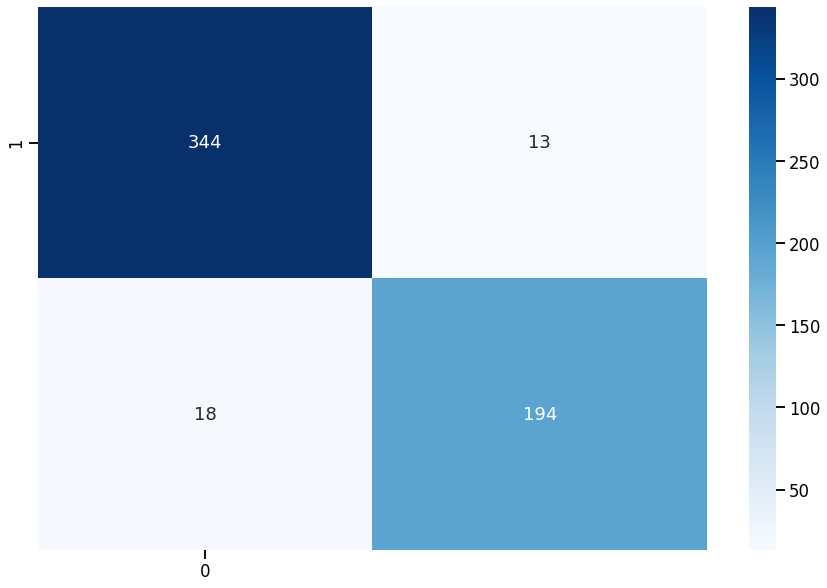

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt
def model_confusion_matrix(dfy,predictions):
    cf = confusion_matrix(dfy, predictions)
    return cf

cf_rf = model_confusion_matrix(y,pred_rf)

def plot_confusion_matrix(cf):
    lbl1 = [0]
    lbl2 = [1]
    plt.figure(figsize=(15, 10))
    sns.heatmap(cf, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
    plt.show()

plot_confusion_matrix(cf_rf)

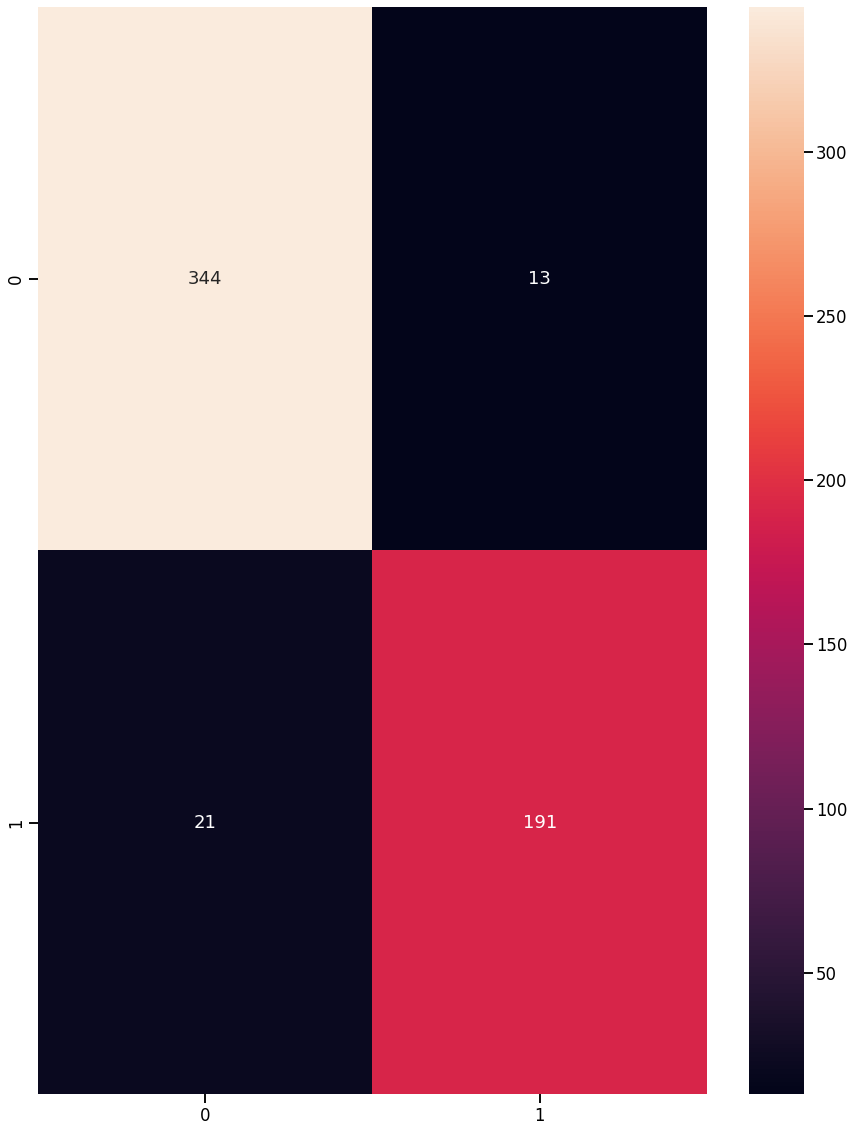

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set_context('talk')
cm = confusion_matrix(y, predict)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [55]:
#GridSearch is used to tune the hyper-parameters for the classifier
#Take time - around 50 minutes
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [80,95,110],
    'max_features': [ 3, 5],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 9,10],
    'n_estimators': [100,200,300,500,800,1000] #number of forests
}
rfc = RandomForestClassifier()
# cv = n-cross-validation
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, refit = 'TRUE')
grid_search.fit(X_train, y_train)

print('Melhores parametros = \n',grid_search.best_params_)
print('\nMelhor pontuação: \n',grid_search.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Melhores parametros = 
 {'criterion': 'gini', 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}

Melhor pontuação: 
 0.9342723004694836


In [56]:
feature_importantes = pd.DataFrame(grid_search.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importantes)

                        importance
concave points_mean           0.27
perimeter_mean                0.21
area_mean                     0.14
radius_mean                   0.13
concavity_mean                0.13
texture_mean                  0.05
compactness_mean              0.04
smoothness_mean               0.02
fractal_dimension_mean        0.01
symmetry_mean                 0.01
